In [1]:
#I highly recommend modifying the python environment to be compatible with this code before running it according to NN_py310.yaml. 
#This notebook already contains the output. If you want to re-run it, it may take about 9 hours.#

In [1]:
import os
os.environ["MKL_NUM_THREADS"] = "2"
os.environ["NUMEXPR_NUM_THREADS"] = "2"
os.environ["OMP_NUM_THREADS"] = "2"

import pandas as pd
import numpy as np

file_path = 'CarsData.csv'
data = pd.read_csv(file_path)

print(data.head())
print(data.info())
print(data.describe())

           model  year  price transmission  mileage fuelType  tax   mpg  \
0            I10  2017   7495       Manual    11630   Petrol  145  60.1   
1           Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2       2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3   Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4         Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   

   engineSize Manufacturer  
0         1.0       hyundi  
1         1.0   volkswagen  
2         2.0          BMW  
3         2.0        skoda  
4         1.2         ford  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mil

In [2]:
import matplotlib.pyplot as plt # plots
import plotly.express as px

data = pd.get_dummies(data, columns=['transmission', 'fuelType'])



df = pd.DataFrame(data)
df['age'] = 2024 - df['year']
df.drop('year', axis=1, inplace=True)


df = df[(df['mpg'] >= 10) & (df['mpg'] <= 120)]

df = df[(df['engineSize'] >= 0.6) & (df['engineSize'] <= 6.5)]
model_mean_prices = df.groupby('model')['price'].mean()
df['model_mean_price'] = df['model'].map(model_mean_prices)
manufacturer_mean_prices = df.groupby('Manufacturer')['price'].mean()
df['manufacturer_mean_price'] = df['Manufacturer'].map(manufacturer_mean_prices)

from sklearn.preprocessing import StandardScaler

numerical_features = ['mileage', 'tax', 'mpg', 'engineSize', 'age','model_mean_price','manufacturer_mean_price']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.drop('model', axis=1, inplace=True)
df.drop('Manufacturer', axis=1, inplace=True)

df.head()

,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,age,model_mean_price,manufacturer_mean_price
0,7495,-0.549652,0.389234,0.491594,-1.209581,False,True,False,False,False,False,False,False,True,0.030712,-1.163868,-0.758954
1,10989,-0.665127,0.389234,0.385848,-1.209581,False,True,False,False,False,False,False,False,True,0.030712,-0.699369,0.009443
2,27990,-1.025618,0.389234,-0.433683,0.599311,False,False,False,True,True,False,False,False,False,-0.914568,0.354550,1.121767
3,12495,0.368921,0.468351,0.729523,0.599311,False,True,False,False,True,False,False,False,False,0.030712,-0.513582,-0.474039
4,7999,-0.182650,0.072765,-0.019511,-0.847802,False,True,False,False,False,False,False,False,True,0.030712,-0.845349,-0.848712


D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\s

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\s

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\s

D:\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point ['64-64', 'relu', 0.0, 0.01, 64] before, using random point ['16', 'sigmoid', 0.08710389353126081, 0.0008845096062800903, 32]
  warnings.warn(
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `in

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\s

Best score=5034252.5000
Best parameters:
{'hidden_layers': '32-32-32', 'activation': 'relu', 'dropout_rate': 0.0, 'learning_rate': 0.01, 'batch_size': 32}


<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

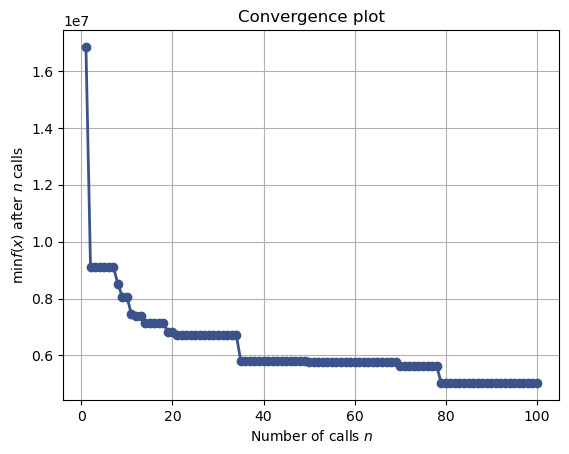

In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from skopt.space import Real, Categorical, Integer

space = [
    Categorical(['16', '32', '16-16', '32-32', '64-64', '16-16-16','32-32-32'], name='hidden_layers'),
    Categorical(['relu', 'tanh', 'sigmoid'], name='activation'),
    Real(0.0, 0.3, name='dropout_rate'),
    Real(0.0001, 0.01, prior='log-uniform', name='learning_rate'),
    Categorical([32, 64, 128, 256], name='batch_size')
]


from skopt.utils import use_named_args

@use_named_args(space)
def objective(hidden_layers, activation, dropout_rate, learning_rate, batch_size):
    hidden_layers = [int(n) for n in hidden_layers.split('-')]  
    model = Sequential()
    for i, layer_size in enumerate(hidden_layers):
        if i == 0:
            model.add(Dense(layer_size, activation=activation, input_shape=(X_train.shape[1],)))
        else:
            model.add(Dense(layer_size, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    result = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))
    validation_loss = np.min(result.history['val_loss'])
    return validation_loss


from skopt import gp_minimize

result = gp_minimize(objective, space, n_calls=100, random_state=0)

print("Best score=%.4f" % result.fun)
print("Best parameters:")
best_params = {dimension.name: result.x[i] for i, dimension in enumerate(space)}
print(best_params)

from skopt.plots import plot_convergence
plot_convergence(result)



Epoch 1/200
2423/2423 [==============================] - 3s 982us/step - loss: 17582624.0000 - mean_absolute_error: 2316.7947 - val_loss: 10035349.0000 - val_mean_absolute_error: 1918.2173
Epoch 2/200
2423/2423 [==============================] - 2s 908us/step - loss: 8792876.0000 - mean_absolute_error: 1853.1715 - val_loss: 9045730.0000 - val_mean_absolute_error: 1885.9166
Epoch 3/200
2423/2423 [==============================] - 2s 916us/step - loss: 8494914.0000 - mean_absolute_error: 1832.8453 - val_loss: 9967888.0000 - val_mean_absolute_error: 1909.4250
Epoch 4/200
2423/2423 [==============================] - 2s 902us/step - loss: 8283846.5000 - mean_absolute_error: 1809.4569 - val_loss: 8672348.0000 - val_mean_absolute_error: 1785.8942
Epoch 5/200
2423/2423 [==============================] - 2s 903us/step - loss: 8133254.0000 - mean_absolute_error: 1794.5918 - val_loss: 10216070.0000 - val_mean_absolute_error: 1971.4104
Epoch 6/200
2423/2423 [==============================] - 2s 93

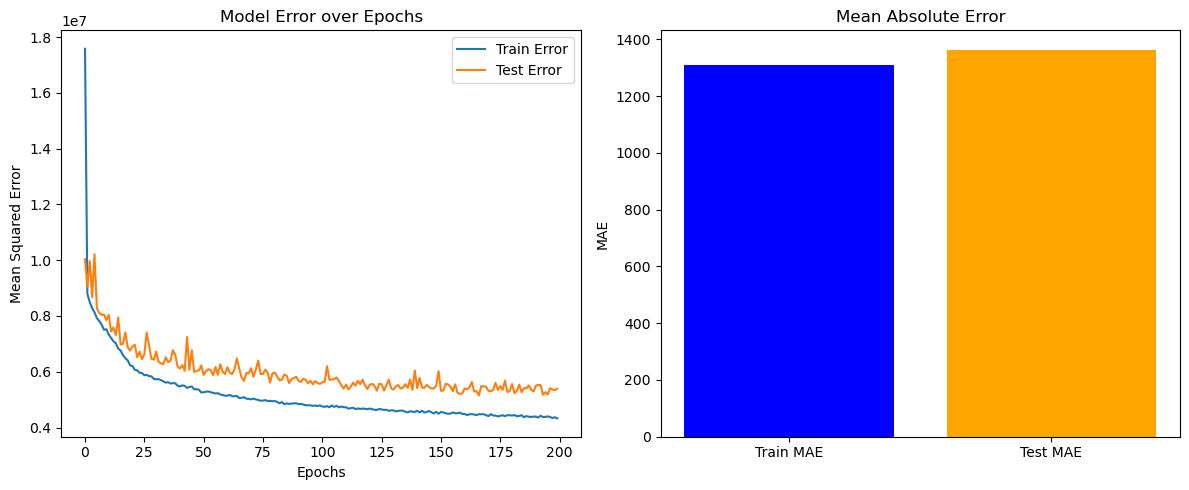

Training MAE: 1308.4021
Test MAE: 1363.9867
Training R-squared: 0.9558
Test R-squared: 0.9443


In [7]:
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

hidden_layers = [int(n) for n in '32-32-32'.split('-')]
activation = 'relu'
dropout_rate = 0.0
learning_rate = 0.01
batch_size = 32

model = Sequential()
for i, layer_size in enumerate(hidden_layers):
    if i == 0:
        model.add(Dense(layer_size, activation=activation, input_shape=(X_train.shape[1],)))
    else:
        model.add(Dense(layer_size, activation=activation))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
model.add(Dense(1))
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

result = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='Train Error')
plt.plot(result.history['val_loss'], label='Test Error')
plt.title('Model Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

plt.subplot(1, 2, 2)
plt.bar(['Train MAE', 'Test MAE'], [train_mae, test_mae], color=['blue', 'orange'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Test R-squared: {test_r2:.4f}")


In [3]:
import tensorflow as tf
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop(['price'], axis=1)
y = df['price']

tf.config.threading.set_intra_op_parallelism_threads(2)  
tf.config.threading.set_inter_op_parallelism_threads(2)  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

space = {
    'hidden_layers': hp.choice('hidden_layers', ['16', '32', '16-16', '32-32', '64-64', '16-16-16', '32-32-32']),
    'activation': hp.choice('activation', ['relu', 'tanh', 'sigmoid']),
    'dropout_rate': hp.uniform('dropout_rate', 0.0, 0.3),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'batch_size': hp.choice('batch_size', [32, 64, 128, 256])
}


def objective(params):
    hidden_layers = [int(n) for n in params['hidden_layers'].split('-')]  
    model = Sequential()
    for i, layer_size in enumerate(hidden_layers):
        if i == 0:
            model.add(Dense(layer_size, activation=params['activation'], input_shape=(X_train.shape[1],)))
        else:
            model.add(Dense(layer_size, activation=params['activation']))
        if params['dropout_rate'] > 0:
            model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    result = model.fit(X_train, y_train, epochs=200, batch_size=int(params['batch_size']), verbose=0, validation_data=(X_test, y_test))
    validation_loss = np.min(result.history['val_loss'])
    return {'loss': validation_loss, 'status': STATUS_OK}


trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials,
    rstate=np.random.default_rng(42)  
)


print("Best: ", best)


100%|████████████████████████████████████████████████████| 100/100 [6:25:48<00:00, 231.48s/trial, best loss: 5818727.0]
Best:  {'activation': 0, 'batch_size': 0, 'dropout_rate': 0.05656447122184355, 'hidden_layers': 4, 'learning_rate': 0.00589829059746538}


In [5]:
hidden_layers_options = ['16', '32', '16-16', '32-32', '64-64', '16-16-16', '32-32-32']
activation_options = ['relu', 'tanh', 'sigmoid']
batch_size_options = [32, 64, 128, 256]
best_hidden_layers = hidden_layers_options[best['hidden_layers']]
best_activation = activation_options[best['activation']]
best_batch_size = batch_size_options[best['batch_size']]
best_dropout_rate = best['dropout_rate']
best_learning_rate = best['learning_rate']
print("Detailed Best Parameters:")
print(f"Hidden Layers: {best_hidden_layers}")
print(f"Activation: {best_activation}")
print(f"Dropout Rate: {best_dropout_rate}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Batch Size: {best_batch_size}")

Detailed Best Parameters:
Hidden Layers: 64-64
Activation: relu
Dropout Rate: 0.05656447122184355
Learning Rate: 0.00589829059746538
Batch Size: 32


Epoch 1/200
2423/2423 [==============================] - 2s 806us/step - loss: 28150684.0000 - mean_absolute_error: 2957.9539 - val_loss: 10323867.0000 - val_mean_absolute_error: 1960.8026
Epoch 2/200
2423/2423 [==============================] - 2s 769us/step - loss: 10324973.0000 - mean_absolute_error: 2024.6144 - val_loss: 9883364.0000 - val_mean_absolute_error: 1914.1691
Epoch 3/200
2423/2423 [==============================] - 2s 759us/step - loss: 9858674.0000 - mean_absolute_error: 1980.3376 - val_loss: 9810687.0000 - val_mean_absolute_error: 1832.5642
Epoch 4/200
2423/2423 [==============================] - 2s 771us/step - loss: 9654976.0000 - mean_absolute_error: 1957.9598 - val_loss: 9154286.0000 - val_mean_absolute_error: 1792.8018
Epoch 5/200
2423/2423 [==============================] - 2s 774us/step - loss: 9508605.0000 - mean_absolute_error: 1939.6101 - val_loss: 9062229.0000 - val_mean_absolute_error: 1792.9756
Epoch 6/200
2423/2423 [==============================] - 2s 75

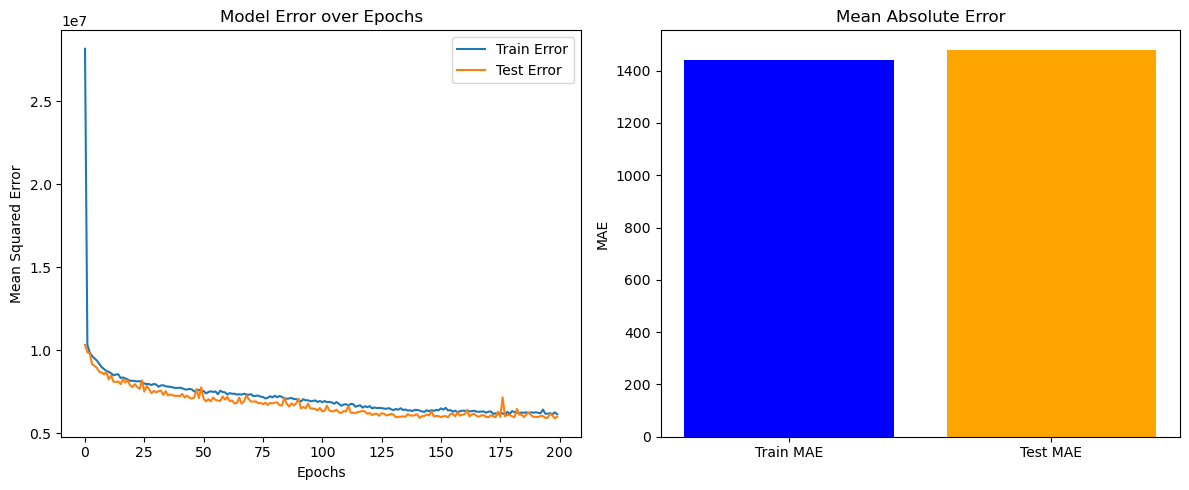

Training MAE: 1441.7646
Test MAE: 1480.1105
Training R-squared: 0.9480
Test R-squared: 0.9380


In [8]:
import tensorflow as tf
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score  
import numpy as np
import matplotlib.pyplot as plt  

hidden_layers = [int(n) for n in '64-64'.split('-')]
activation = 'relu'
dropout_rate = 0.05
learning_rate = 0.005
batch_size = 32


model = Sequential()
for i, layer_size in enumerate(hidden_layers):
    if i == 0:
        model.add(Dense(layer_size, activation=activation, input_shape=(X_train.shape[1],)))
    else:
        model.add(Dense(layer_size, activation=activation))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
model.add(Dense(1))
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])


result = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='Train Error')
plt.plot(result.history['val_loss'], label='Test Error')
plt.title('Model Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()


y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()


train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)


train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)


plt.subplot(1, 2, 2)
plt.bar(['Train MAE', 'Test MAE'], [train_mae, test_mae], color=['blue', 'orange'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Test R-squared: {test_r2:.4f}")